<a href="https://colab.research.google.com/github/BhanuPrakash0710/MajorProject-LiverCirrhosis/blob/main/liver-cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup

**Installing Required Libraries**

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00


Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

This line of code is to avoid warnings in future whenever a feature gets added
the libraries or packages that we have used.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Configuring the pandas library for better result display

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x:'%.3f'%x)

Add the Dataset to the workbench

# Exploratory Data Analysis

**The Original Dataset**

In [5]:
df=pd.read_csv('/content/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.500,261.000,2.600,156.000,1718.000,137.950,172.000,190.000,12.200,4.000
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.100,302.000,4.140,54.000,7394.800,113.520,88.000,221.000,10.600,3.000
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.400,176.000,3.480,210.000,516.000,96.100,55.000,151.000,12.000,4.000
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.800,244.000,2.540,64.000,6121.800,60.630,92.000,183.000,10.300,4.000
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.400,279.000,3.530,143.000,671.000,113.150,72.000,136.000,10.900,3.000


**Understanding the features mentioned in the dataset**



*   N_Days : Number of days between registration and the earlier of death or transplantation
*   Status : Status of the patient C (censored), CL (censored due to liver tx), or D (death)


*   Drug: type of drug D-penicillamine or placebo
*   Age: Age of the person[in days]


*   Sex: M (male) or F (female)
*   Ascites: Ascites is a condition in which fluid collects in spaces within your abdomen


*   Hepatomegaly: Hepatomegaly is enlargement of the liver beyond its normal size.
*   Spiders: Spider nevi, especially if there is more than one, is a common sign of liver disease. People with liver disease often have multiple vessel clusters at a time.


*   Edema: Edema is swelling caused by too much fluid building up inside the body.
*   Bilirubin: Bilirubin (bil-ih-ROO-bin) is a yellowish pigment that is made during the breakdown of red blood cells. Bilirubin passes through the liver and is eventually excreted out of the body. Higher than usual levels of bilirubin may indicate different types of liver or bile duct problems.[mg/dl]


*   Cholesterol: Cholesterol is a waxy, fat-like substance that your body needs for good health, but in the right amounts.[mg/dl]
*   Albumin: Albumin is a protein made by your liver. Albumin enters your bloodstream and helps keep fluid from leaking out of your blood vessels into other tissues.[gm/dl]


*   Copper: The copper urine test is used to determine the presence of Wilson disease, a sometimes fatal condition in which the buildup of excess copper damages the liver.[ug/day]
*   Alk_Phos: An alkaline phosphatase (ALP) test measures the amount of ALP in the blood. It is commonly used to diagnose liver damage or bone disorders.[U/liter]


*   SGOT: AST, or aspartate aminotransferase, is one of the two liver enzymes. It is also known as serum glutamic-oxaloacetic transaminase, or SGOT.[U/ml]
*   Triglycerides: Triglycerides are a type of fat, called lipid , that circulate in your blood.[mg/dl]


*   Platelets: A tiny, disc-shaped piece of cell that is found in the blood and spleen.They help form blood clots to slow or stop bleeding and to help wounds heal.[ml/1000]
*    Prothrombin: A prothrombin time (PT) test measures how long it takes for a clot to form in a blood sample. An INR (international normalized ratio) is a type of calculation based on PT test results. Prothrombin is a protein made by the liver.[s]


*   Stage: Histologic stage of disease (1, 2, 3, or 4)






















**Data Preprocessing**

In [6]:
df.drop(['ID'], axis=1, inplace=True)

In [7]:
df['Age'] = (df['Age'].values/365).round()

**Complete Overview**

Here we examine the general characteristics and properties of the dataset. This includes:

*   Data Shape
*   Data Types

* Missing Values  
*   Summary Statistics

*   Categorical Variables
*   Relationships










In [8]:
def check_df(dataframe, head=5):
    print("############################# Shape #############################")
    print(dataframe.shape)
    print("\n")
    print("############################# Dtype #############################")
    print(dataframe.dtypes)
    print("\n")
    print("############################# Head #############################")
    print(dataframe.head(head))
    print("\n")
    print("############################# Tail #############################")
    print(dataframe.tail(head))
    print("\n")
    print("############################# NA #############################")
    print(dataframe.isnull().sum())
    print("\n")
    print("############################# Quantiles #############################")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
    print("\n")

check_df(df)

############################# Shape #############################
(418, 19)


############################# Dtype #############################
N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


############################# Head #############################
   N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0     400      D  D-penicillamine 59.000   F       Y            Y       Y     Y     14.500   
1    4500      C  D-penicillamine 56.000   F       N            Y       Y     N      1.100   
2    1012      D  

**Separating Categorical and Numerical Attributes**

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    This function takes a dataframe as input and returns the names of categorical, numerical, and categorical but cardinal variables.
    Note: Numerical variables with categorical appearance are also included in the categorical variables.

    Parameters
    ----------
    dataframe: dataframe
            Dataframe from which variable names are to be extracted.
    cat_th: int, optional
            threshold value for numerical but categorical variables.
    car_th: int, optional
            threshold value for categorical but cardinal variables.

    Returns
    -------
    cat_cols: list
            List of categorical variable names.
    num_cols: list
            List of numerical variable names.
    cat_but_car:list
            List of categorical (but cardinal) variable names.

    Notes
    -------
        cat_cols + num_cols + cat_but_car = total number of variables
        The variable "num_but_cat" is included in "cat_cols" (the list of categorical variables).

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    #num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observation: 418
Variables: 19
cat_cols: 8
num_cols: 11
cat_but_car: 0
num_but_cat: 1


In [10]:
cat_cols

['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Stage']

In [11]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

Converting Stage which is numerical attribute to categorical attribute

In [12]:
df['Stage'] = df['Stage'].astype(object)
print (df['Stage'].dtypes)

object


**Categorical features analysis**

In [13]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#############################################################")
    print("\n")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [14]:
for col in cat_cols:
    cat_summary(df,col)

    Status  Ratio
C      232 55.502
D      161 38.517
CL      25  5.981
#############################################################


                 Drug  Ratio
D-penicillamine   158 37.799
Placebo           154 36.842
#############################################################


   Sex  Ratio
F  374 89.474
M   44 10.526
#############################################################


   Ascites  Ratio
N      288 68.900
Y       24  5.742
#############################################################


   Hepatomegaly  Ratio
Y           160 38.278
N           152 36.364
#############################################################


   Spiders  Ratio
N      222 53.110
Y       90 21.531
#############################################################


   Edema  Ratio
N    354 84.689
S     44 10.526
Y     20  4.785
#############################################################


       Stage  Ratio
3.000    155 37.081
4.000    144 34.450
2.000     92 22.010
1.000     21  5.024
##########

**Numerical feature analysis**

In [15]:
def num_summary(dataframe, numeric_col, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numeric_col].describe(quantiles).T)

    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.ylabel("Sample Count")
        plt.title(numeric_col)
        plt.interactive(False)
        plt.show(block=True)

count    418.000
mean    1917.782
std     1104.673
min       41.000
5%       245.100
10%      606.800
20%      974.800
30%     1217.600
40%     1434.800
50%     1730.000
60%     2107.000
70%     2465.000
80%     2851.800
90%     3524.200
max     4795.000
Name: N_Days, dtype: float64


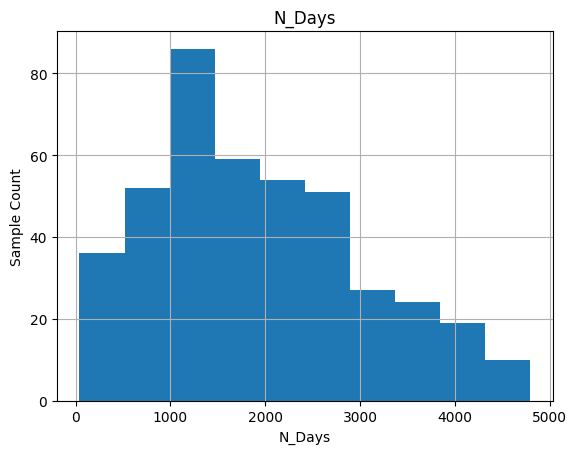

count   418.000
mean     50.773
std      10.443
min      26.000
5%       34.000
10%      36.700
20%      41.000
30%      45.000
40%      48.000
50%      51.000
60%      54.000
70%      56.000
80%      61.000
90%      64.300
max      78.000
Name: Age, dtype: float64


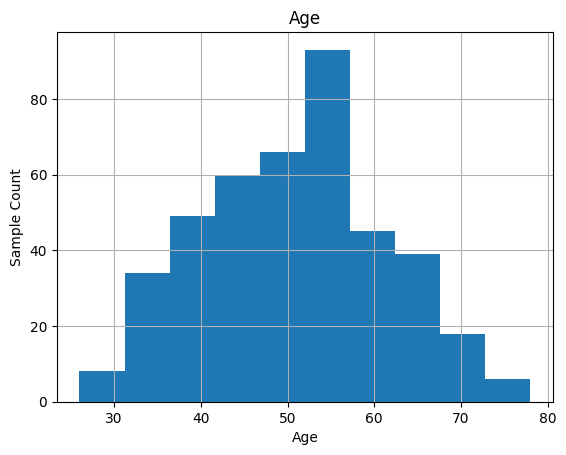

count   418.000
mean      3.221
std       4.408
min       0.300
5%        0.500
10%       0.600
20%       0.700
30%       0.900
40%       1.100
50%       1.400
60%       2.000
70%       3.000
80%       4.500
90%       8.030
max      28.000
Name: Bilirubin, dtype: float64


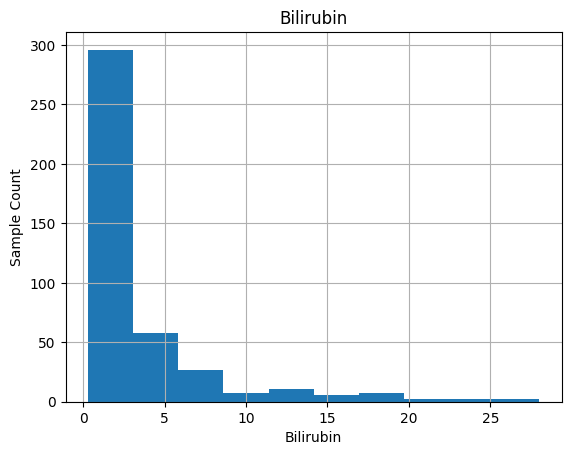

count    284.000
mean     369.511
std      231.945
min      120.000
5%       188.450
10%      213.600
20%      239.000
30%      258.900
40%      280.000
50%      309.500
60%      337.600
70%      375.100
80%      429.000
90%      560.800
max     1775.000
Name: Cholesterol, dtype: float64


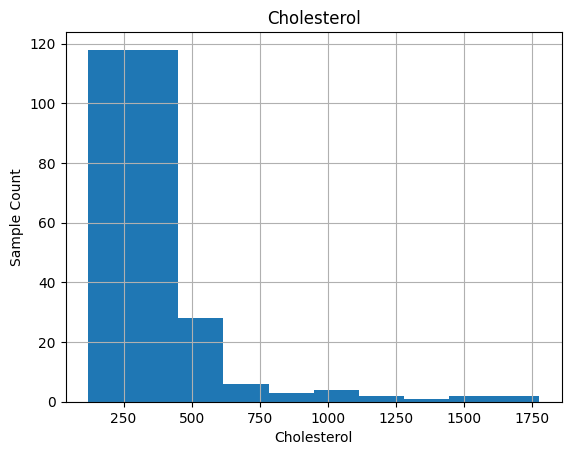

count   418.000
mean      3.497
std       0.425
min       1.960
5%        2.750
10%       2.967
20%       3.154
30%       3.340
40%       3.430
50%       3.530
60%       3.622
70%       3.720
80%       3.836
90%       4.010
max       4.640
Name: Albumin, dtype: float64


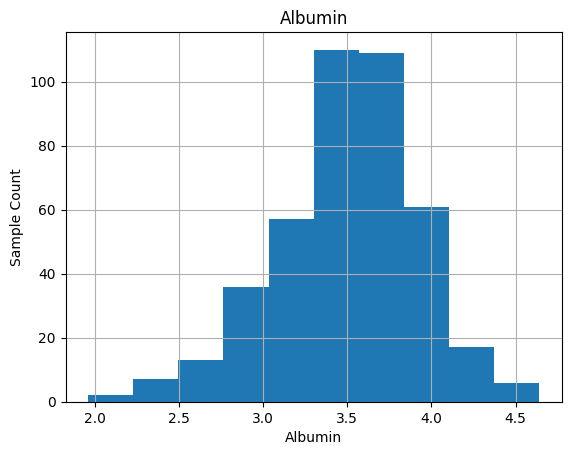

count   310.000
mean     97.648
std      85.614
min       4.000
5%       17.450
10%      24.000
20%      37.800
30%      48.000
40%      58.000
50%      73.000
60%      84.000
70%     108.000
80%     148.400
90%     208.100
max     588.000
Name: Copper, dtype: float64


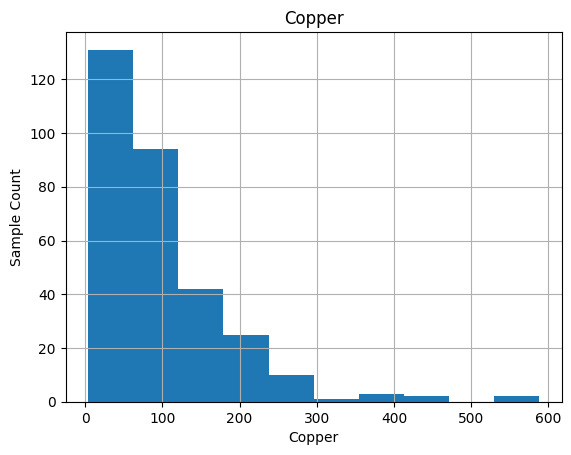

count     312.000
mean     1982.656
std      2140.389
min       289.000
5%        599.650
10%       663.000
20%       798.400
30%       964.900
40%      1089.400
50%      1259.000
60%      1554.800
70%      1823.900
80%      2240.200
90%      3826.400
max     13862.400
Name: Alk_Phos, dtype: float64


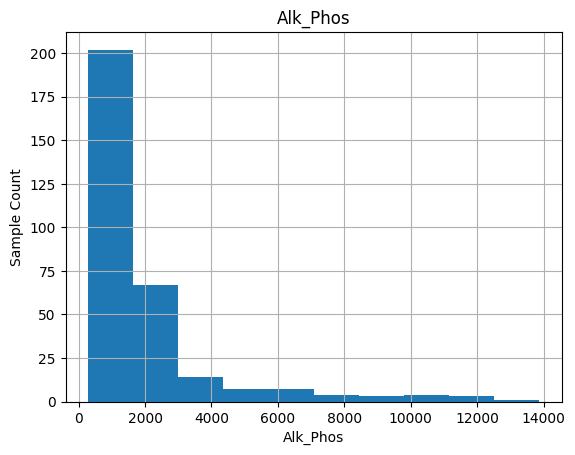

count   312.000
mean    122.556
std      56.700
min      26.350
5%       54.250
10%      60.450
20%      74.400
30%      86.800
40%      98.400
50%     114.700
60%     127.100
70%     139.850
80%     165.850
90%     196.465
max     457.250
Name: SGOT, dtype: float64


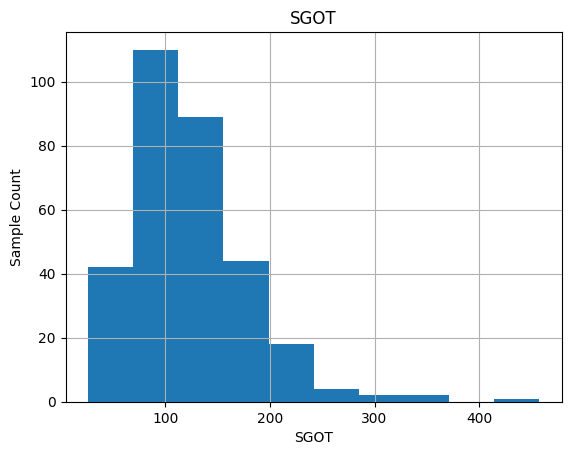

count   282.000
mean    124.702
std      65.149
min      33.000
5%       56.000
10%      63.100
20%      78.000
30%      89.000
40%      99.000
50%     108.000
60%     121.600
70%     140.000
80%     162.800
90%     195.000
max     598.000
Name: Tryglicerides, dtype: float64


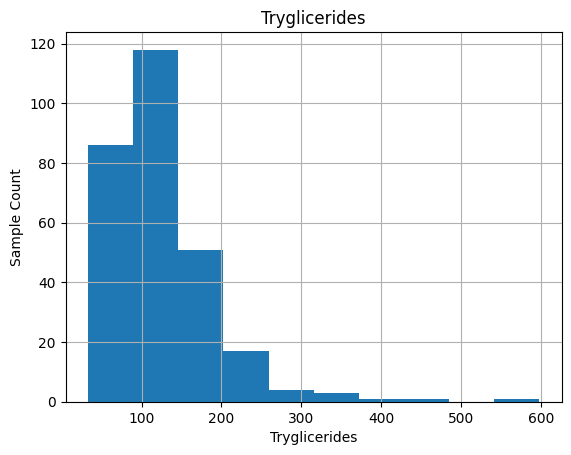

count   407.000
mean    257.025
std      98.326
min      62.000
5%      114.900
10%     138.200
20%     166.200
30%     203.000
40%     226.000
50%     251.000
60%     272.200
70%     302.200
80%     335.000
90%     386.200
max     721.000
Name: Platelets, dtype: float64


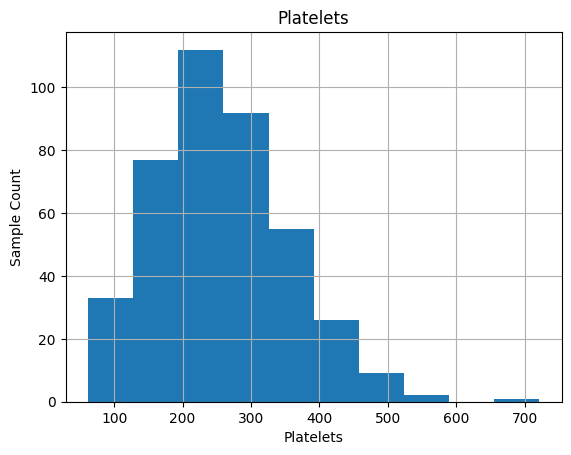

count   416.000
mean     10.732
std       1.022
min       9.000
5%        9.600
10%       9.800
20%       9.900
30%      10.100
40%      10.400
50%      10.600
60%      10.800
70%      11.000
80%      11.300
90%      12.000
max      18.000
Name: Prothrombin, dtype: float64


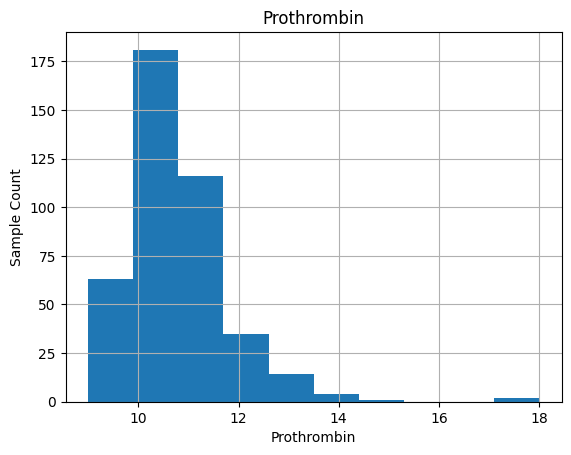

In [16]:
for col in num_cols:
    num_summary(df, col, plot="True")

**Target Variable Analysis**



*    Mean of the target variable by categorical variables




In [17]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean(),
                        "Count":dataframe.groupby(categorical_col)[target].count(),
                        "Ratio":100* dataframe[categorical_col].value_counts()/ dataframe.shape[0]}))

In [18]:
for col in cat_cols:
    target_summary_with_cat(df, "Stage", col)
    print("\n")

Status
    TARGET_MEAN  Count  Ratio
C         2.774    230 55.502
CL        3.200     25  5.981
D         3.363    157 38.517


Drug
                 TARGET_MEAN  Count  Ratio
D-penicillamine        2.975    158 37.799
Placebo                3.091    154 36.842


Sex
   TARGET_MEAN  Count  Ratio
F        3.019    368 89.474
M        3.068     44 10.526


Ascites
   TARGET_MEAN  Count  Ratio
N        2.969    288 68.900
Y        3.792     24  5.742


Hepatomegaly
   TARGET_MEAN  Count  Ratio
N        2.612    152 36.364
Y        3.431    160 38.278


Spiders
   TARGET_MEAN  Count  Ratio
N        2.869    222 53.110
Y        3.433     90 21.531


Edema
   TARGET_MEAN  Count  Ratio
N        2.937    348 84.689
S        3.386     44 10.526
Y        3.750     20  4.785


Stage
       TARGET_MEAN  Count  Ratio
1.000        1.000     21  5.024
2.000        2.000     92 22.010
3.000        3.000    155 37.081
4.000        4.000    144 34.450






*    Mean of the target variable by numerical variables



In [19]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}))

In [20]:
for col in num_cols:
    target_summary_with_num(df, "Stage", col)
    print("\n")

        N_Days
Stage         
1.000 2654.810
2.000 2389.837
3.000 1997.452
4.000 1420.250


         Age
Stage       
1.000 47.000
2.000 49.478
3.000 48.974
4.000 53.812


       Bilirubin
Stage           
1.000      1.362
2.000      2.453
3.000      2.826
4.000      4.427


       Cholesterol
Stage             
1.000      267.846
2.000      353.180
3.000      415.852
4.000      337.811


       Albumin
Stage         
1.000    3.705
2.000    3.607
3.000    3.592
4.000    3.302


       Copper
Stage        
1.000  62.812
2.000  68.030
3.000  92.075
4.000 127.102


       Alk_Phos
Stage          
1.000  1694.213
2.000  1816.907
3.000  2082.128
4.000  2017.367


         SGOT
Stage        
1.000  84.460
2.000 115.562
3.000 124.327
4.000 130.498


       Tryglicerides
Stage               
1.000         90.846
2.000        113.951
3.000        130.735
4.000        129.063


       Platelets
Stage           
1.000    291.800
2.000    286.895
3.000    263.118
4.000    224.866


       Prothro

**Correlation Analysis**

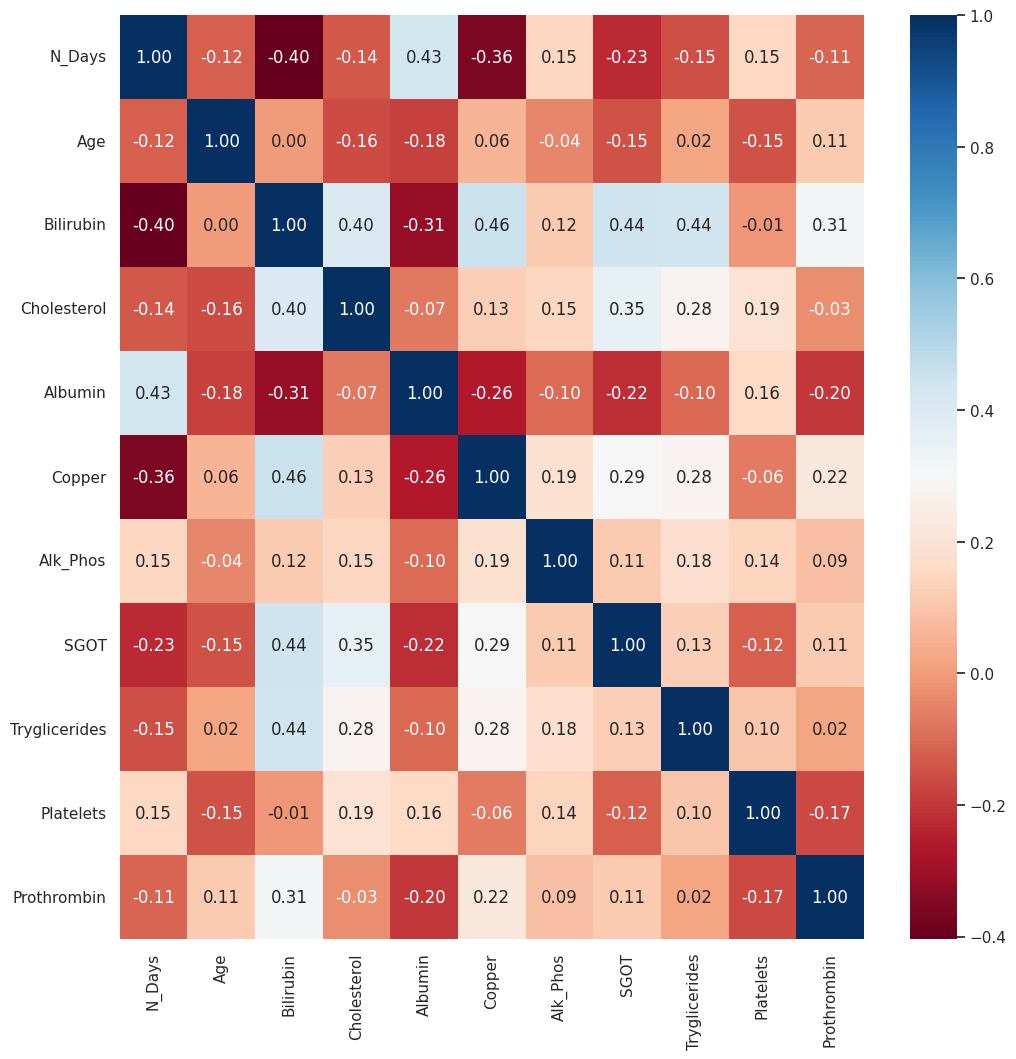

In [21]:
corr = df[num_cols].corr()

sns.set(rc = {"figure.figsize":(12,12)})
ax = sns.heatmap(corr, fmt=".2f", annot=True, cmap="RdBu") # korelasyonu gözlemleyebilmek için ısı haritası oluşturduk
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.interactive(False)
plt.show()

**Outlier Analysis**



*   Set the Upper and lower limit


In [22]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquantile_range= quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



*   Outlier Detection

        **False** indicates that there is no outlier in that feature
        **True** indicates that there exist atleast one outlier in the feature


In [23]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [24]:
for col in num_cols:
    if col != "Stage":
        print(col, check_outlier(df,col))

N_Days False
Age False
Bilirubin False
Cholesterol True
Albumin False
Copper False
Alk_Phos False
SGOT False
Tryglicerides True
Platelets False
Prothrombin True


**Handling the Outliers**

In [25]:
def replace_with_threshold(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [26]:
for col in num_cols:
    if col != "Stage":
        replace_with_threshold(df, col)

In [27]:
for col in num_cols:
    if col != "Stage":
        print(col, check_outlier(df,col))

N_Days False
Age False
Bilirubin False
Cholesterol False
Albumin False
Copper False
Alk_Phos False
SGOT False
Tryglicerides False
Platelets False
Prothrombin False


**Missing Data Analysis**



*   Missing Data detection



In [28]:
def missing_value_analysis(dataframe):

    print("Amount of missing data is there in each feature")
    print(dataframe.isnull().sum())
    print("##############################")
    print("\n")

    print("Amount of complete values are there in each feature")
    print(dataframe.notnull().sum())
    print("##############################")
    print("\n")

    print("Total number of missing values in the dataset:")
    print(dataframe.isnull().sum().sum())
    print("##############################")
    print("\n")


In [29]:
missing_value_analysis(df)

Amount of missing data is there in each feature
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64
##############################


Amount of complete values are there in each feature
N_Days           418
Status           418
Drug             312
Age              418
Sex              418
Ascites          312
Hepatomegaly     312
Spiders          312
Edema            418
Bilirubin        418
Cholesterol      284
Albumin          418
Copper           310
Alk_Phos         312
SGOT             312
Tryglicerides    282
Platelets        407
Prothrombin      416
Stage            412
dtype: int64
##############################


Total numb

In [30]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [31]:
na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Tryglicerides     136 32.540
Cholesterol       134 32.060
Copper            108 25.840
Drug              106 25.360
Ascites           106 25.360
Hepatomegaly      106 25.360
Spiders           106 25.360
Alk_Phos          106 25.360
SGOT              106 25.360
Platelets          11  2.630
Stage               6  1.440
Prothrombin         2  0.480


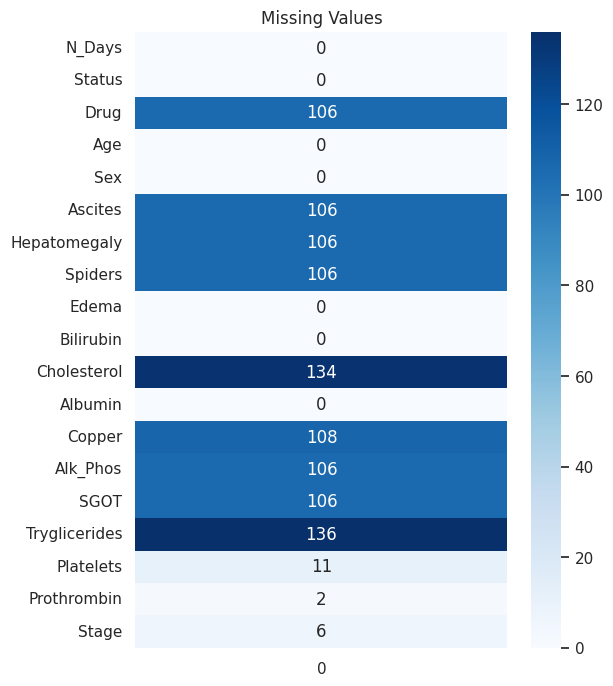

In [32]:
plt.figure(figsize=(6, 8))
plt.title('Missing Values')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='Blues')
plt.show()



*   Filling the missing data

         Imputation method is 'MODE' for categorical variables
         Imputation method is 'MEDIAN' for numeric variables



In [33]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="Stage"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Lists the variables with missing values

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Number of missing values in variables before the application

    # If the variable is object type and has a number of unique values less than or equal to cat_length, fill the missing values with mode
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # If num_method is 'mean', fill the missing values of non-object type variables with the mean
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # If num_method is 'median', fill the missing values of non-object type variables with the median
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [34]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Drug             0
Ascites          0
Hepatomegaly     0
Spiders          0
Cholesterol      0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            6
dtype: int64 




Droping the 6 rows where the Stage attribute value is NULL or NA

In [35]:
df.dropna(inplace=True)

# ML Models and their Analysis

In [36]:
dff = df.copy()

In [37]:
cat_cols, cat_but_car, num_cols = grab_col_names(dff)

Observation: 412
Variables: 19
cat_cols: 8
num_cols: 11
cat_but_car: 0
num_but_cat: 0


Removing the "Stage"" variable from the categorical features list since it is the target variable

In [38]:
cat_cols = [col for col in cat_cols if col not in ["Stage"]]
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

**Encoding**

      Encoding simply refers to the process of coverting categorical data to numerical data.We can achieve this through different techniques.The two prominent techniques are:
      1.Label Encoding
      2.One-Hot Encoding





*   Lable Encoding (Not used in our model..Just for reference)



In [39]:
def label_encoder(dataframe, binary_col, drop_first=True):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [40]:
binary_cols = [col for col in dff.columns if dff[col].dtype not in [int, float] and dff[col].nunique() == 2]
print(binary_cols)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']


In [41]:
for col in binary_cols:
    label_encoder(dff, col)

In [42]:
dff.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400.000,D,0,59.000,0,1,1,1,Y,14.500,261.000,2.600,156.000,1718.000,137.950,172.000,190.000,12.200,4.000
1,4500.000,C,0,56.000,0,0,1,1,N,1.100,302.000,4.140,54.000,7394.800,113.520,88.000,221.000,10.600,3.000
2,1012.000,D,0,70.000,1,0,0,0,S,1.400,176.000,3.480,210.000,516.000,96.100,55.000,151.000,12.000,4.000
3,1925.000,D,0,55.000,0,0,1,1,S,1.800,244.000,2.540,64.000,6121.800,60.630,92.000,183.000,10.300,4.000
4,1504.000,CL,1,38.000,0,0,1,1,N,3.400,279.000,3.530,143.000,671.000,113.150,72.000,136.000,10.900,3.000




*   One-Hot Encoding



In [43]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [44]:
dff = one_hot_encoder(dff, cat_cols, drop_first=True)
dff.shape

(412, 21)

In [45]:
dff.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,400.000,59.000,14.500,261.000,2.600,156.000,1718.000,137.950,172.000,190.000,12.200,4.000,0,1,0,0,1,1,1,0,1
1,4500.000,56.000,1.100,302.000,4.140,54.000,7394.800,113.520,88.000,221.000,10.600,3.000,0,0,0,0,0,1,1,0,0
2,1012.000,70.000,1.400,176.000,3.480,210.000,516.000,96.100,55.000,151.000,12.000,4.000,0,1,0,1,0,0,0,1,0
3,1925.000,55.000,1.800,244.000,2.540,64.000,6121.800,60.630,92.000,183.000,10.300,4.000,0,1,0,0,0,1,1,1,0
4,1504.000,38.000,3.400,279.000,3.530,143.000,671.000,113.150,72.000,136.000,10.900,3.000,1,0,1,0,0,1,1,0,0


**Models that are being Used**

In [46]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("GBM", GradientBoostingClassifier()),
          ("CatBoost", CatBoostClassifier(iterations = 100, verbose=False)),
         ]

**Hold Out Validation**

In [47]:
df_hold_out = dff.copy()
y = df_hold_out["Stage"].astype(int)
X = df_hold_out.drop(["Stage","N_Days","Status_CL","Status_D"], axis=1)

In [48]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

0.4457831325301205
Performance Metrics for LR on Test and Train Sets


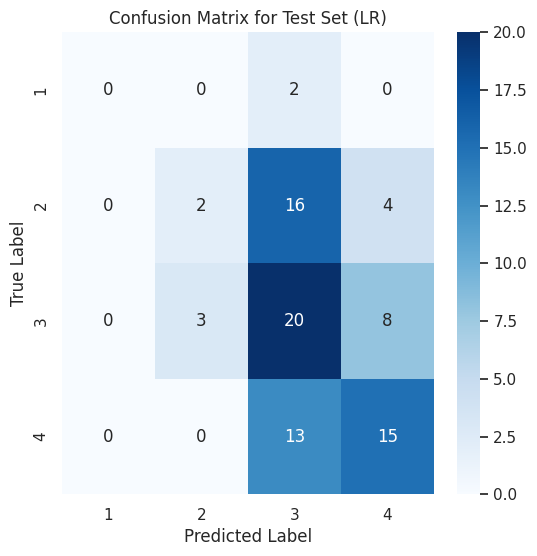



Classification Report for Test Set (LR) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.40      0.09      0.15        22
           3       0.39      0.65      0.49        31
           4       0.56      0.54      0.55        28

    accuracy                           0.45        83
   macro avg       0.34      0.32      0.30        83
weighted avg       0.44      0.45      0.41        83





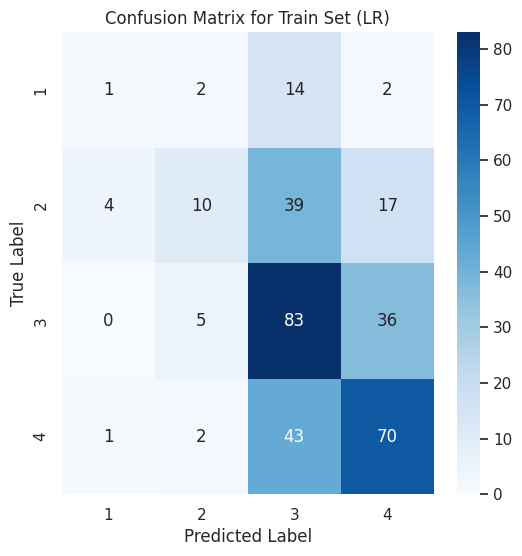

Classification Report for Train Set (LR) :
              precision    recall  f1-score   support

           1       0.17      0.05      0.08        19
           2       0.53      0.14      0.22        70
           3       0.46      0.67      0.55       124
           4       0.56      0.60      0.58       116

    accuracy                           0.50       329
   macro avg       0.43      0.37      0.36       329
weighted avg       0.49      0.50      0.46       329

-----------------------------------------------------------------------


0.3493975903614458
Performance Metrics for KNN on Test and Train Sets


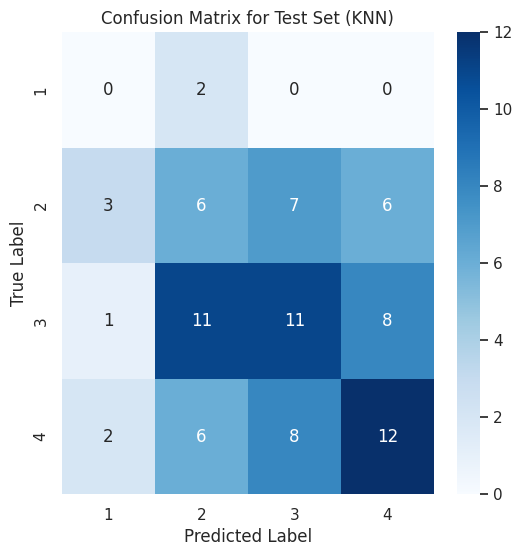



Classification Report for Test Set (KNN) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.24      0.27      0.26        22
           3       0.42      0.35      0.39        31
           4       0.46      0.43      0.44        28

    accuracy                           0.35        83
   macro avg       0.28      0.26      0.27        83
weighted avg       0.38      0.35      0.36        83





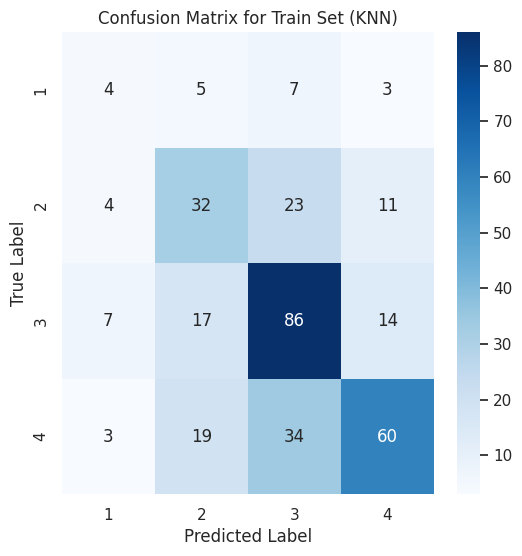

Classification Report for Train Set (KNN) :
              precision    recall  f1-score   support

           1       0.22      0.21      0.22        19
           2       0.44      0.46      0.45        70
           3       0.57      0.69      0.63       124
           4       0.68      0.52      0.59       116

    accuracy                           0.55       329
   macro avg       0.48      0.47      0.47       329
weighted avg       0.56      0.55      0.55       329

-----------------------------------------------------------------------


0.4578313253012048
Performance Metrics for CART on Test and Train Sets


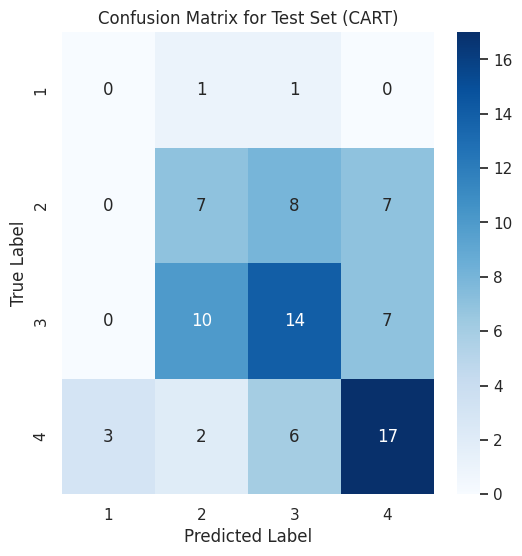



Classification Report for Test Set (CART) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.35      0.32      0.33        22
           3       0.48      0.45      0.47        31
           4       0.55      0.61      0.58        28

    accuracy                           0.46        83
   macro avg       0.35      0.34      0.34        83
weighted avg       0.46      0.46      0.46        83





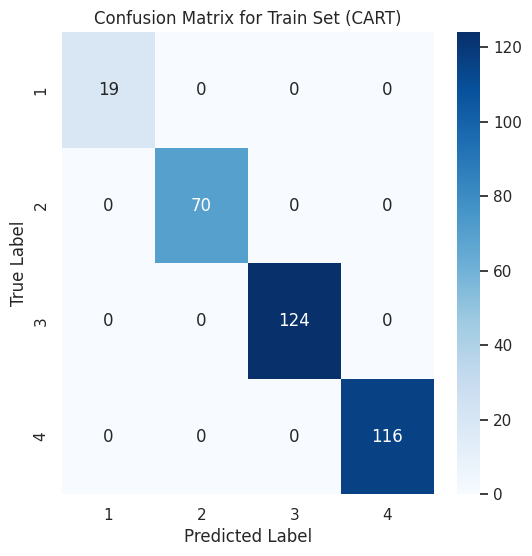

Classification Report for Train Set (CART) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


0.5542168674698795
Performance Metrics for RF on Test and Train Sets


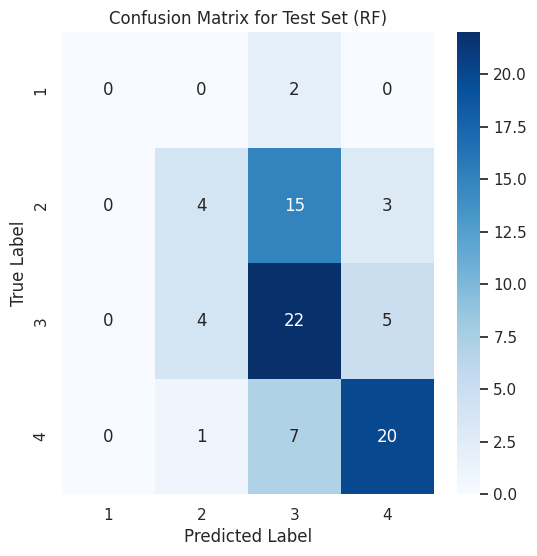



Classification Report for Test Set (RF) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.44      0.18      0.26        22
           3       0.48      0.71      0.57        31
           4       0.71      0.71      0.71        28

    accuracy                           0.55        83
   macro avg       0.41      0.40      0.39        83
weighted avg       0.54      0.55      0.52        83





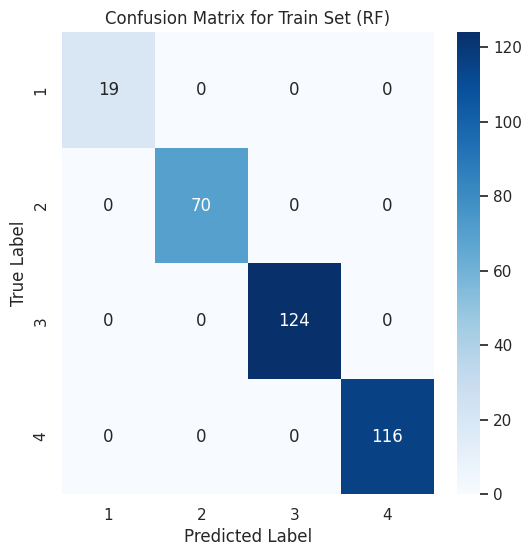

Classification Report for Train Set (RF) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


0.5180722891566265
Performance Metrics for GBM on Test and Train Sets


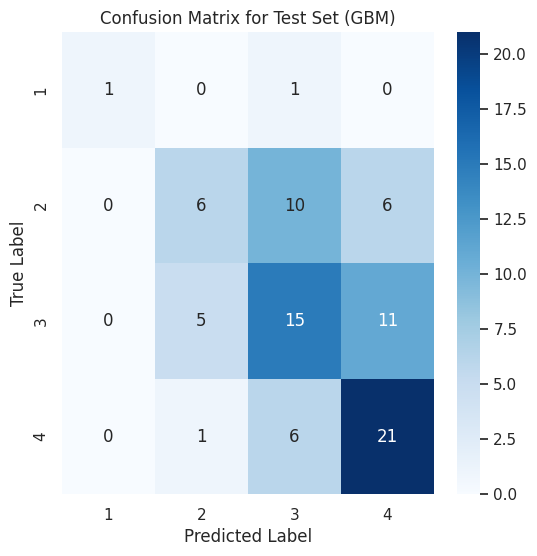



Classification Report for Test Set (GBM) :
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.50      0.27      0.35        22
           3       0.47      0.48      0.48        31
           4       0.55      0.75      0.64        28

    accuracy                           0.52        83
   macro avg       0.63      0.50      0.53        83
weighted avg       0.52      0.52      0.50        83





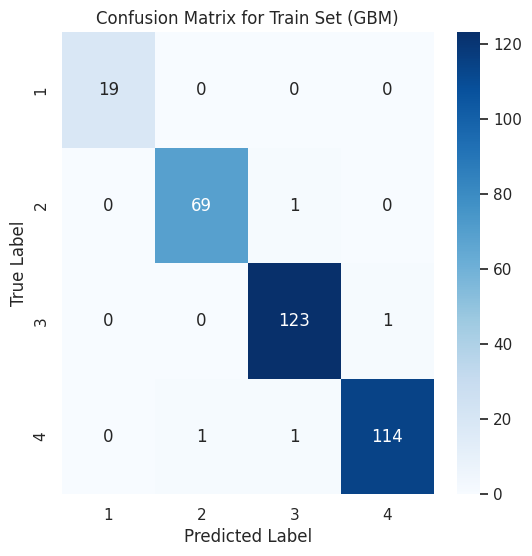

Classification Report for Train Set (GBM) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.99      0.99      0.99        70
           3       0.98      0.99      0.99       124
           4       0.99      0.98      0.99       116

    accuracy                           0.99       329
   macro avg       0.99      0.99      0.99       329
weighted avg       0.99      0.99      0.99       329

-----------------------------------------------------------------------


0.5301204819277109
Performance Metrics for CatBoost on Test and Train Sets


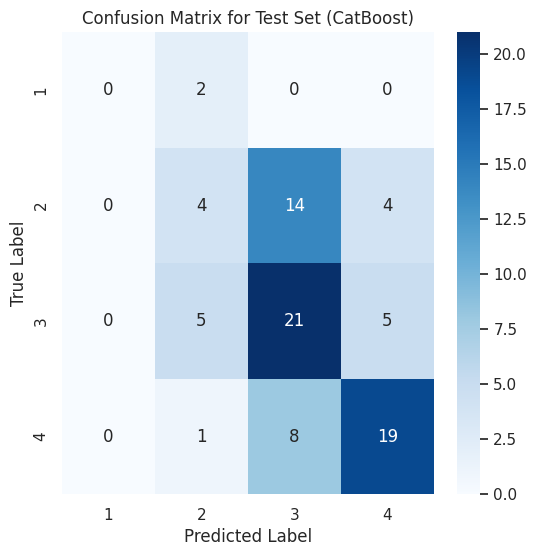



Classification Report for Test Set (CatBoost) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.18      0.24        22
           3       0.49      0.68      0.57        31
           4       0.68      0.68      0.68        28

    accuracy                           0.53        83
   macro avg       0.38      0.38      0.37        83
weighted avg       0.50      0.53      0.50        83





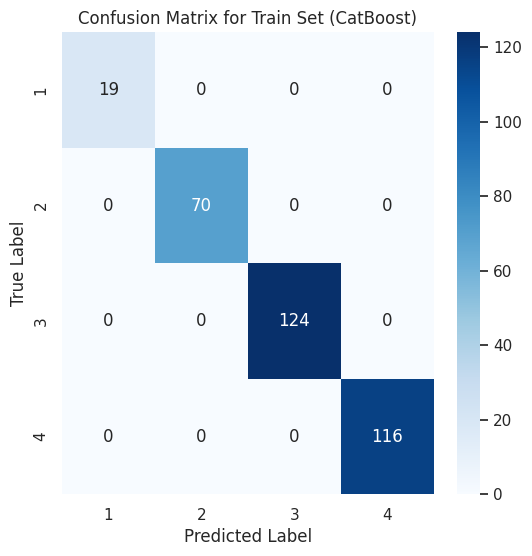

Classification Report for Train Set (CatBoost) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------




In [49]:
class_names = ["1", "2", "3", "4"]
for name, classifier in models:

    warnings.filterwarnings("ignore")

    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test,y_pred)

    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test,y_pred)
    print(test_accuracy)

    # The confusion matrix allows us to examine the correct and incorrect prediction results for each class in the models.
    # This provides a detailed analysis opportunity for accuracy evaluation.

    # Confusion matrix for the test set provides the following results
    print(f"Performance Metrics for {name} on Test and Train Sets")
    cm_test = confusion_matrix(y_test, y_pred)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Test Set ({name})')
    plt.show()
    print("\n")

    # Classification report provides f1, precision, recall, and accuracy values for each class in all models.
    # It is used for a detailed analysis of performance metrics in classification models.

    cr_test = classification_report(y_test, y_pred)
    print(f"Classification Report for Test Set ({name}) :\n{cr_test}")
    print("\n")

    # Confusion matrix results for the training set

    cm_train = confusion_matrix(y_train, y_pred_train)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Train Set ({name})')
    plt.show()

    cr_train = classification_report(y_train, y_pred_train)
    print(f"Classification Report for Train Set ({name}) :\n{cr_train}")
    print("-----------------------------------------------------------------------")
    print("\n")

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(train_accuracy)
print(test_accuracy)

1.0
0.5301204819277109


In [51]:
import pickle

In [52]:
filename = 'cirrhosis_trained_model.sav'
pickle.dump(rf,open(filename,'wb'))

In [53]:
data = {"model": rf}
with open('saved.pkl','wb') as file:
  pickle.dump(data,file)

In [54]:
with open('saved.pkl','rb') as file:
  data = pickle.load(file)

rf_loaded = data["model"]

In [55]:
y_pred = rf_loaded.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print(test_accuracy)

0.5301204819277109


**k-fold Cross Validation**

In [56]:
df_cross_validation = dff.copy()

for name, classifier in models:

    warnings.filterwarnings("ignore")

    # Perform k-fold cross-validation using the cross_val_score function.
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

    # Display the results.
    print(f"---------------------- {name} Model ----------------------")

    print("Accuracy:", cv_results['test_accuracy'])
    print("Precision:", cv_results['test_precision_macro'])
    print("Recall:", cv_results['test_recall_macro'])
    print("F1-score:", cv_results['test_f1_macro'])
    print("..")
    print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
    print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
    print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
    print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
    print("\n")

---------------------- LR Model ----------------------
Accuracy: [0.36144578 0.45783133 0.45121951 0.5        0.45121951]
Precision: [0.2765942  0.33630952 0.3203125  0.39081028 0.32696477]
Recall: [0.26268954 0.33171116 0.33696391 0.35008034 0.3249909 ]
F1-score: [0.24702381 0.31888103 0.32749767 0.32541877 0.29875081]
..
Average Accuracy: 0.44
Average Precision: 0.33
Average Recall: 0.32
Average F1-score: 0.3


---------------------- KNN Model ----------------------
Accuracy: [0.36144578 0.43373494 0.35365854 0.34146341 0.35365854]
Precision: [0.2577381  0.31968811 0.27897123 0.27496971 0.2519603 ]
Recall: [0.25657163 0.33305525 0.26744222 0.26520208 0.27634611]
F1-score: [0.24049383 0.32548407 0.25883838 0.26157653 0.23922764]
..
Average Accuracy: 0.37
Average Precision: 0.28
Average Recall: 0.28
Average F1-score: 0.27


---------------------- CART Model ----------------------
Accuracy: [0.42168675 0.36144578 0.3902439  0.40243902 0.47560976]
Precision: [0.35557796 0.34021942 0.3740

# Feature Engineering

  The goal of feature engineering is to make the features in a dataset more meaningful, improve model performance, and achieve better results. This process typically involves understanding the dataset, preprocessing the data, feature selection, and feature transformation.

  Creating the following new features from the existing features:


*   N_Days_new
*   Threshold Values for Biomarkers in Liver Disease Diagnosis (Bilirubin, Cholesterol, Albumin, Copper, Alkaline Phosphatase (Alk_Phos), SGOT, Tryglicerides, Platelets, and Prothrombin)
*   NEW_SEX_CAT
*   drugstage
*   edemastage
*   ascitestage
*   Riskother









In [57]:
df["N_Days_new"] = pd.qcut(df['N_Days'], 5)

In [58]:
df["Bilirubin_high"] = df["Bilirubin"] >= 1.2
df["Cholesterol_high"] = df["Cholesterol"] >= 200
df["Albumin_high"] = df["Albumin"] >= 5.4
df["Albumin_low"] = df["Albumin"] > 3.4 # symptom of illness
df["Copper_low"] = df["Copper"] < 20
df["Copper_high"] = df["Copper"] >= 50 # symptom of illness
df["Alk_Phos_low"] = df["Alk_Phos"] < 44
df["Alk_Phos_high"] = df["Alk_Phos"] > 147
df["SGOT_normal"] = df["SGOT"] <= 36
df["SGOT_high"] = df["SGOT"] > 36
df["Tryglicerides_normal"] = df["Tryglicerides"] <= 199
df["Tryglicerides_high"] = df["Tryglicerides"] > 199
df["Platelets_anormality"] = df["Platelets"] < 180.000
df["Platelets_normality"] = df["Platelets"] >= 180.000
df["Prothrombin_low"] = df["Prothrombin"] <= 11
df["Prothrombin_high"] = df["Prothrombin"] > 13.5
df.loc[(df['Sex'] == "M") & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['Sex'] == "M") & (df['Age'] > 21) & (df['Age'] < 40), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['Sex'] == "M") & (df['Age'] >= 40), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == "F") & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == "F") & (df['Age'] > 21) & (df['Age'] < 40), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == "F") & (df['Age'] >= 40), 'NEW_SEX_CAT'] = 'seniorfemale'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 4), 'drugstage'] = 'needanduse'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 3), 'drugstage'] = 'needanduse'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 2), 'drugstage'] = 'dontneedanduse'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 1), 'drugstage'] = 'dontneedanduse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 4), 'drugstage'] = 'needbutdontuse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 3), 'drugstage'] = 'needbutdontuse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 2), 'drugstage'] = 'dontneedanddontuse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 1), 'drugstage'] = 'dontneedanddontuse'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 1), 'edemastage'] = 'no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 1), 'edemastage'] = 'edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 1), 'edemastage'] = 'edema diuretic'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 2), 'edemastage'] = 'early no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 2), 'edemastage'] = 'early edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 2), 'edemastage'] = 'early edema diuretic'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 3), 'edemastage'] = 'late no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 3), 'edemastage'] = 'late edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 3), 'edemastage'] = 'late edema diuretic'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 4), 'edemastage'] = 'late no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 4), 'edemastage'] = 'late edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 4), 'edemastage'] = 'late edema diuretic'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 1), 'ascitestage'] = 'no illness but ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 1), 'ascitestage'] = 'normal'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 2), 'ascitestage'] = 'illness ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 2), 'ascitestage'] = 'illness noascites'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 3), 'ascitestage'] = 'illness ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 3), 'ascitestage'] = 'illness noascites'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 4), 'ascitestage'] = 'illness ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 4), 'ascitestage'] = 'illness noascites'

In [59]:
df["Riskother"] = df["Tryglicerides"] / df["Cholesterol"]
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Days_new,Bilirubin_high,Cholesterol_high,Albumin_high,Albumin_low,Copper_low,Copper_high,Alk_Phos_low,Alk_Phos_high,SGOT_normal,SGOT_high,Tryglicerides_normal,Tryglicerides_high,Platelets_anormality,Platelets_normality,Prothrombin_low,Prothrombin_high,NEW_SEX_CAT,drugstage,edemastage,ascitestage,Riskother
0,400.000,D,D-penicillamine,59.000,F,Y,Y,Y,Y,14.500,261.000,2.600,156.000,1718.000,137.950,172.000,190.000,12.200,4.000,"(40.999, 976.8]",True,True,False,False,False,True,False,True,False,True,True,False,False,True,False,False,seniorfemale,needanduse,late edema no diuretic,illness ascites,0.659
1,4500.000,C,D-penicillamine,56.000,F,N,Y,Y,N,1.100,302.000,4.140,54.000,7394.800,113.520,88.000,221.000,10.600,3.000,"(2846.4, 4795.0]",False,True,False,True,False,True,False,True,False,True,True,False,False,True,True,False,seniorfemale,needanduse,late no edema,illness noascites,0.291
2,1012.000,D,D-penicillamine,70.000,M,N,N,N,S,1.400,176.000,3.480,210.000,516.000,96.100,55.000,151.000,12.000,4.000,"(976.8, 1434.4]",True,False,False,True,False,True,False,True,False,True,True,False,True,False,False,False,seniormale,needanduse,late edema diuretic,illness noascites,0.312
3,1925.000,D,D-penicillamine,55.000,F,N,Y,Y,S,1.800,244.000,2.540,64.000,6121.800,60.630,92.000,183.000,10.300,4.000,"(1434.4, 2105.6]",True,True,False,False,False,True,False,True,False,True,True,False,False,True,True,False,seniorfemale,needanduse,late edema diuretic,illness noascites,0.377
4,1504.000,CL,Placebo,38.000,F,N,Y,Y,N,3.400,279.000,3.530,143.000,671.000,113.150,72.000,136.000,10.900,3.000,"(1434.4, 2105.6]",True,True,False,True,False,True,False,True,False,True,True,False,True,False,True,False,maturefemale,needbutdontuse,late no edema,illness noascites,0.258


In [60]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observation: 412
Variables: 41
cat_cols: 29
num_cols: 12
cat_but_car: 0
num_but_cat: 17


In [61]:
cat_cols = [col for col in cat_cols if col not in ["Stage"]]
cat_cols

['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'NEW_SEX_CAT',
 'drugstage',
 'edemastage',
 'ascitestage',
 'N_Days_new',
 'Bilirubin_high',
 'Cholesterol_high',
 'Albumin_high',
 'Albumin_low',
 'Copper_low',
 'Copper_high',
 'Alk_Phos_low',
 'Alk_Phos_high',
 'SGOT_normal',
 'SGOT_high',
 'Tryglicerides_normal',
 'Tryglicerides_high',
 'Platelets_anormality',
 'Platelets_normality',
 'Prothrombin_low',
 'Prothrombin_high']

In [62]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [63]:
df.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Riskother,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,drugstage_dontneedanduse,drugstage_needanduse,drugstage_needbutdontuse,edemastage_early edema no diuretic,edemastage_early no edema,edemastage_edema diuretic,edemastage_late edema diuretic,edemastage_late edema no diuretic,edemastage_late no edema,edemastage_no edema,ascitestage_illness noascites,ascitestage_normal,"N_Days_new_(976.8, 1434.4]","N_Days_new_(1434.4, 2105.6]","N_Days_new_(2105.6, 2846.4]","N_Days_new_(2846.4, 4795.0]",Bilirubin_high_True,Cholesterol_high_True,Albumin_low_True,Copper_low_True,Copper_high_True,SGOT_normal_True,SGOT_high_True,Tryglicerides_normal_True,Tryglicerides_high_True,Platelets_anormality_True,Platelets_normality_True,Prothrombin_low_True,Prothrombin_high_True
0,400.000,59.000,14.500,261.000,2.600,156.000,1718.000,137.950,172.000,190.000,12.200,4.000,0.659,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
1,4500.000,56.000,1.100,302.000,4.140,54.000,7394.800,113.520,88.000,221.000,10.600,3.000,0.291,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,1,1,0
2,1012.000,70.000,1.400,176.000,3.480,210.000,516.000,96.100,55.000,151.000,12.000,4.000,0.312,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0
3,1925.000,55.000,1.800,244.000,2.540,64.000,6121.800,60.630,92.000,183.000,10.300,4.000,0.377,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0
4,1504.000,38.000,3.400,279.000,3.530,143.000,671.000,113.150,72.000,136.000,10.900,3.000,0.258,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0


# Final Model

In [64]:
df_hold_out_final = df.copy()

In [65]:
df_hold_out_final.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Riskother,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,drugstage_dontneedanduse,drugstage_needanduse,drugstage_needbutdontuse,edemastage_early edema no diuretic,edemastage_early no edema,edemastage_edema diuretic,edemastage_late edema diuretic,edemastage_late edema no diuretic,edemastage_late no edema,edemastage_no edema,ascitestage_illness noascites,ascitestage_normal,"N_Days_new_(976.8, 1434.4]","N_Days_new_(1434.4, 2105.6]","N_Days_new_(2105.6, 2846.4]","N_Days_new_(2846.4, 4795.0]",Bilirubin_high_True,Cholesterol_high_True,Albumin_low_True,Copper_low_True,Copper_high_True,SGOT_normal_True,SGOT_high_True,Tryglicerides_normal_True,Tryglicerides_high_True,Platelets_anormality_True,Platelets_normality_True,Prothrombin_low_True,Prothrombin_high_True
0,400.000,59.000,14.500,261.000,2.600,156.000,1718.000,137.950,172.000,190.000,12.200,4.000,0.659,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
1,4500.000,56.000,1.100,302.000,4.140,54.000,7394.800,113.520,88.000,221.000,10.600,3.000,0.291,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,1,1,0
2,1012.000,70.000,1.400,176.000,3.480,210.000,516.000,96.100,55.000,151.000,12.000,4.000,0.312,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0
3,1925.000,55.000,1.800,244.000,2.540,64.000,6121.800,60.630,92.000,183.000,10.300,4.000,0.377,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0
4,1504.000,38.000,3.400,279.000,3.530,143.000,671.000,113.150,72.000,136.000,10.900,3.000,0.258,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0


In [66]:
y = df_hold_out_final["Stage"].astype(int)
X = df_hold_out_final.drop(["Stage"], axis=1)

In [67]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
cr_test = classification_report(y_test, y_pred)
print(f"Classification Report for Test Set ({name}) :\n{cr_test}")

Classification Report for Test Set (CatBoost) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.44      0.18      0.26        22
           3       0.49      0.65      0.56        31
           4       0.61      0.71      0.66        28

    accuracy                           0.53        83
   macro avg       0.38      0.39      0.37        83
weighted avg       0.50      0.53      0.50        83



In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(knn, X, y, cv=5, scoring=scoring)

# Display the results.
print(f"----------------------Model ----------------------")

print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision_macro'])
print("Recall:", cv_results['test_recall_macro'])
print("F1-score:", cv_results['test_f1_macro'])
print("..")
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
print("\n")

----------------------Model ----------------------
Accuracy: [0.39759036 0.39759036 0.3902439  0.3902439  0.35365854]
Precision: [0.3003168  0.36911755 0.31571146 0.27314815 0.25892857]
Recall: [0.2869709  0.39855704 0.30217217 0.28276789 0.27912018]
F1-score: [0.27975792 0.36732192 0.28374248 0.27714108 0.26351161]
..
Average Accuracy: 0.39
Average Precision: 0.3
Average Recall: 0.31
Average F1-score: 0.29




In [75]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)

y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(train_accuracy)
print(test_accuracy)

1.0
0.7710843373493976


In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(gbm, X, y, cv=5, scoring=scoring)

# Display the results.
print(f"---------------------- Model ----------------------")

print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision_macro'])
print("Recall:", cv_results['test_recall_macro'])
print("F1-score:", cv_results['test_f1_macro'])
print("..")
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
print("\n")

---------------------- Model ----------------------
Accuracy: [0.79518072 0.79518072 0.76829268 0.74390244 0.7195122 ]
Precision: [0.87678571 0.85825893 0.85213415 0.83125    0.82954545]
Recall: [0.85614133 0.85789766 0.83316339 0.82230256 0.75748848]
F1-score: [0.85472596 0.85797828 0.83341837 0.81891348 0.76192135]
..
Average Accuracy: 0.76
Average Precision: 0.85
Average Recall: 0.83
Average F1-score: 0.83




In [74]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(train_accuracy)
print(test_accuracy)

1.0
0.7349397590361446


In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(dt, X, y, cv=5, scoring=scoring)

# Display the results.
print(f"---------------------- {name} Model ----------------------")

print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision_macro'])
print("Recall:", cv_results['test_recall_macro'])
print("F1-score:", cv_results['test_f1_macro'])
print("..")
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
print("\n")

---------------------- CatBoost Model ----------------------
Accuracy: [0.69879518 0.71084337 0.69512195 0.67073171 0.64634146]
Precision: [0.79888889 0.79977753 0.79722222 0.78174603 0.78911565]
Recall: [0.78828816 0.79977753 0.78199543 0.76282289 0.70314395]
F1-score: [0.78994654 0.79977753 0.77080011 0.77073784 0.70639637]
..
Average Accuracy: 0.68
Average Precision: 0.79
Average Recall: 0.77
Average F1-score: 0.77




In [73]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(test_accuracy)
cr_test = classification_report(y_test, y_test_pred)
print(f"Classification Report for Test Set ({name}) :\n{cr_test}")

0.7951807228915663
Classification Report for Test Set (CatBoost) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.95      0.98        22
           3       0.70      0.84      0.76        31
           4       0.74      0.61      0.67        28

    accuracy                           0.80        83
   macro avg       0.86      0.85      0.85        83
weighted avg       0.80      0.80      0.79        83



In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf, X, y, cv=5, scoring=scoring)

# Display the results.
print(f"---------------------- Model ----------------------")

print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision_macro'])
print("Recall:", cv_results['test_recall_macro'])
print("F1-score:", cv_results['test_f1_macro'])
print("..")
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
print("\n")

---------------------- Model ----------------------
Accuracy: [0.79518072 0.8313253  0.79268293 0.7804878  0.73170732]
Precision: [0.87678571 0.88375973 0.875      0.87986111 0.83730159]
Recall: [0.85614133 0.88375973 0.8551168  0.84067173 0.76468894]
F1-score: [0.85472596 0.88333333 0.85135529 0.83920217 0.77857143]
..
Average Accuracy: 0.79
Average Precision: 0.87
Average Recall: 0.84
Average F1-score: 0.84




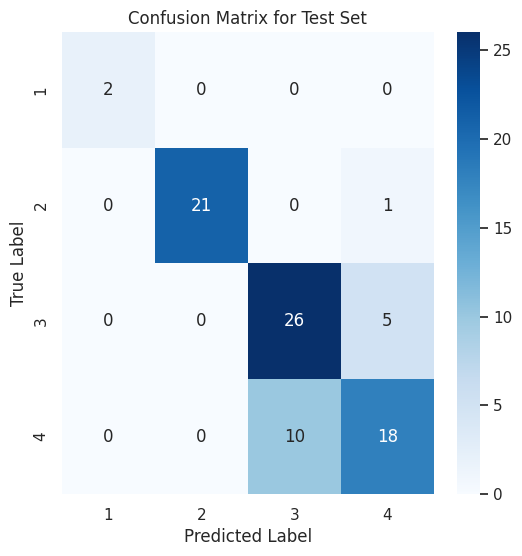

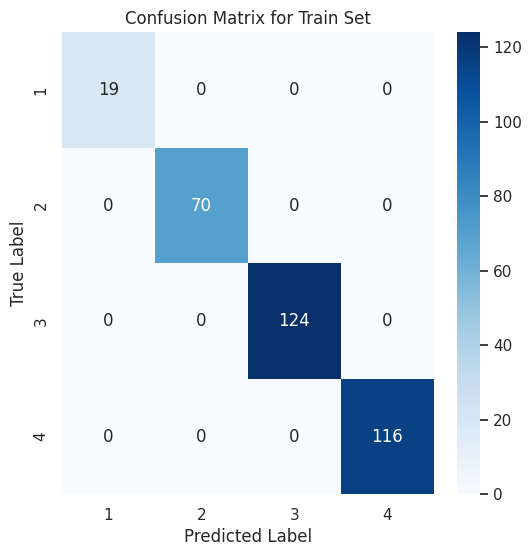

In [ ]:
    cm_test = confusion_matrix(y_test, y_test_pred)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Test Set')
    plt.show()
    print("\n")


    # Confusion matrix results for the training set

    cm_train = confusion_matrix(y_train, y_train_pred)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Train Set')
    plt.show()

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [ ]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('Accuracy of training data : ',training_data_accuracy)
print('Accuracy of testing data : ',testing_data_accuracy)

Accuracy of training data :  0.8206686930091185
Accuracy of testing data :  0.7590361445783133


In [ ]:
input_data = (1924.000,55.000,1.800,223.000,2.40,64.000,6111.700,50.630,92.000,172.000,10.300,0.377,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0)
input_data_as_nparray = np.asarray(input_data)
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = rf.predict(input_data_reshaped)
print("As per Data the stage of the disease is - ",prediction[0])


As per Data the stage of the disease is -  4


In [97]:
from sklearn.ensemble import StackingClassifier
estimator_list =[
    ('rf',rf),
    ('dt',dt)
]

meta_model= StackingClassifier(
    estimators=estimator_list,final_estimator=gbm
)

meta_model.fit(X_train,y_train)

y_train_pred = meta_model.predict(X_train)
y_test_pred = meta_model.predict(X_test)

meta_train_accuracy = accuracy_score(y_train,y_train_pred)
meta_test_accuracy = accuracy_score(y_test,y_test_pred)

print(meta_train_accuracy)
print(meta_test_accuracy)

cr_test = classification_report(y_test, y_test_pred)
print(f"Classification Report for Test Set  :\n{cr_test}")

0.8996960486322189
0.7831325301204819
Classification Report for Test Set  :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.95      0.98        22
           3       0.73      0.71      0.72        31
           4       0.67      0.71      0.69        28

    accuracy                           0.78        83
   macro avg       0.85      0.84      0.85        83
weighted avg       0.79      0.78      0.79        83



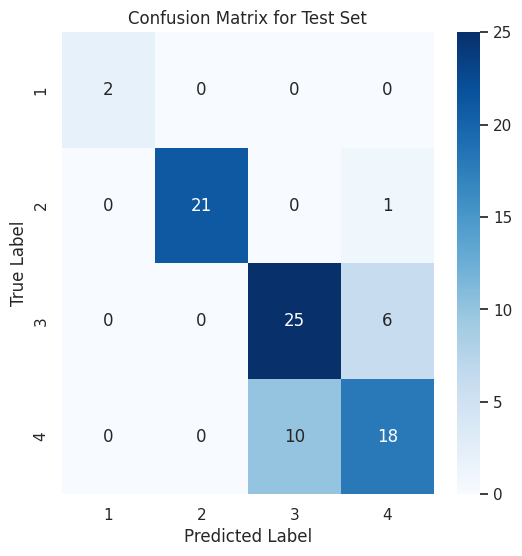

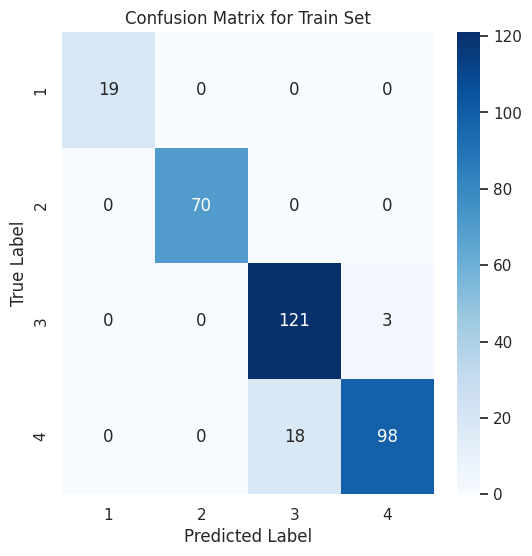

In [80]:
cm_test = confusion_matrix(y_test, y_test_pred)
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Test Set')
plt.show()
print("\n")


# Confusion matrix results for the training set

cm_train = confusion_matrix(y_train, y_train_pred)

class_labels = np.unique(y_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Train Set')
plt.show()

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(meta_model, X, y, cv=5, scoring=scoring)

# Display the results.
print(f"----------------------  Model ----------------------")

print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision_macro'])
print("Recall:", cv_results['test_recall_macro'])
print("F1-score:", cv_results['test_f1_macro'])
print("..")
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
print("\n")

----------------------  Model ----------------------
Accuracy: [0.73493976 0.77108434 0.7195122  0.73170732 0.74390244]
Precision: [0.82573198 0.84375    0.8104067  0.81714286 0.83486842]
Recall: [0.81359405 0.84010011 0.80617353 0.81535039 0.77275346]
F1-score: [0.81445536 0.83948184 0.80392157 0.81481481 0.78434605]
..
Average Accuracy: 0.74
Average Precision: 0.83
Average Recall: 0.81
Average F1-score: 0.81




In [ ]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("GBM", GradientBoostingClassifier()),
          ("CatBoost", CatBoostClassifier(iterations = 100, verbose=False)),
]

In [ ]:
df_cross_validation_final = df.copy()

In [ ]:
y = df_cross_validation_final["Stage"].astype(int)
X = df_cross_validation_final.drop(["Stage"], axis=1)

In [102]:
for name, classifier in models:

    warnings.filterwarnings("ignore")

    # Performing k-fold cross-validation using the cross_val_score function
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(classifier, X, y, cv=8, scoring=scoring)

    # To display the results
    print(f"---------------------- {name} Model ----------------------")

    print("Accuracy:", cv_results['test_accuracy'])
    print("Precision:", cv_results['test_precision_macro'])
    print("Recall:", cv_results['test_recall_macro'])
    print("F1-score:", cv_results['test_f1_macro'])
    print("..")
    print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
    print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
    print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
    print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
    print("\n")

---------------------- LR Model ----------------------
Accuracy: [0.44230769 0.30769231 0.44230769 0.36538462 0.45098039 0.41176471
 0.45098039 0.47058824]
Precision: [0.35595238 0.3019385  0.32532895 0.31698718 0.2975     0.20328283
 0.33011364 0.48095238]
Recall: [0.34040404 0.32752525 0.33207071 0.26352339 0.31834795 0.28143275
 0.32675439 0.33705476]
F1-score: [0.29929504 0.3046798  0.32519361 0.27480159 0.29330332 0.23183761
 0.31347469 0.29555124]
..
Average Accuracy: 0.42
Average Precision: 0.33
Average Recall: 0.32
Average F1-score: 0.29


---------------------- KNN Model ----------------------
Accuracy: [0.34615385 0.30769231 0.44230769 0.36538462 0.41176471 0.39215686
 0.25490196 0.37254902]
Precision: [0.29375    0.26767677 0.36047794 0.34210084 0.32321429 0.29126082
 0.25075758 0.28338509]
Recall: [0.31994949 0.24785354 0.35113636 0.29203216 0.28837719 0.29276316
 0.19919591 0.2757177 ]
F1-score: [0.29973772 0.24199704 0.34973545 0.28847962 0.27133003 0.2875
 0.20965819 0.2

In [103]:
    warnings.filterwarnings("ignore")

    # Performing k-fold cross-validation using the cross_val_score function
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(meta_model, X, y, cv=5, scoring=scoring)

    # To display the results
    print(f"---------------------- Meta Model ----------------------")

    print("Accuracy:", cv_results['test_accuracy'])
    print("Precision:", cv_results['test_precision_macro'])
    print("Recall:", cv_results['test_recall_macro'])
    print("F1-score:", cv_results['test_f1_macro'])
    print("..")
    print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
    print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
    print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
    print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
    print("\n")

---------------------- Meta Model ----------------------
Accuracy: [0.74698795 0.72289157 0.70731707 0.75609756 0.69512195]
Precision: [0.82866379 0.80825792 0.8042362  0.85142119 0.78720588]
Recall: [0.82054622 0.80728587 0.79699666 0.8245427  0.73617512]
F1-score: [0.82384434 0.80699301 0.79166667 0.82422575 0.75395841]
..
Average Accuracy: 0.73
Average Precision: 0.82
Average Recall: 0.8
Average F1-score: 0.8


